In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
import time
from sklearn.linear_model import SGDRegressor
from sklearn.utils import shuffle

In [2]:
df = pd.read_csv('C://Users//saish//Desktop//MEDIUM//lr//data.csv', index_col=False)

In [3]:
df.head()

,Hours,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


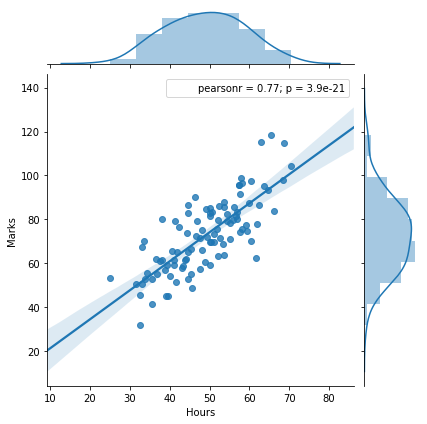

In [4]:
sns.jointplot(x=df['Hours'], y=df['Marks'], data=df, kind='reg')

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df['Hours'], df['Marks'], test_size=0.2, random_state=42)
x_train = np.reshape(x_train, (-1,1))
x_test = np.reshape(x_test, (-1,1))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

#
print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)

Train - Predictors shape (80, 1)
Test - Predictors shape (20, 1)
Train - Target shape (80, 1)
Test - Target shape (20, 1)


C:\Users\saish\Anaconda2\envs\tensorflow\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


# Batch Gradient Descent

In [6]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b

In [7]:
def model_optimize(w,b,X,Y):
    #
    m = X.shape[0]
    #
    final_result = np.dot(w, X.T) + b
    cost = (1/m)*np.sum((Y.T - final_result) ** 2)
    #
    dw = (-2/m)*np.sum((np.dot(X.T,(Y.T - final_result).T)))
    db = (-2/m)*np.sum(((Y.T - final_result)))
    #
    grads = {"dw": dw, "db": db}
    
    return grads, cost
    

In [8]:
def gradientUpdate(w,b,X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize(w,b, X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #Weight Update
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)
        #
        
        costs.append(cost)
    #
    
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

In [9]:
def predict(x,w,b):
    final_pred = np.dot(w, x.T) + b
    return final_pred

In [10]:
start_time = time.time()
#
#Get number of features
n_features = x_train.shape[1]
m_tr = x_train.shape[0]
m_ts = x_test.shape[0]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)
#Gradient Descent
coeff, gradient, costs = gradientUpdate(w, b, x_train, y_train, learning_rate=0.0001,no_iterations=20)
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)
#
final_tr_pred = predict(x_train, w,b)
final_tr_cost = (1/m_tr)*np.sum((y_train.T - final_tr_pred) ** 2)
print('Training error',final_tr_cost)
#
final_ts_pred = predict(x_test, w,b)
final_ts_cost = (1/m_ts)*np.sum((y_test.T - final_ts_pred) ** 2)
print('Test error',final_ts_cost)
#
print('Model R^2 Square value', metrics.r2_score(y_test, final_ts_pred.T))
#
print("--- %s seconds ---" % (time.time() - start_time))

Number of Features 1
Optimized weights [[ 1.48658234]]
Optimized intercept 0.0309054136254
Training error 110.04357167
Test error 123.811976369
Model R^2 Square value 0.689273846511
--- 0.0020036697387695312 seconds ---


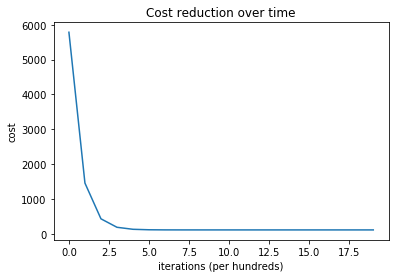

In [11]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

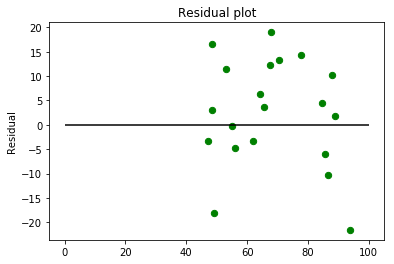

In [12]:
plt.scatter(final_ts_pred, final_ts_pred.T - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')

# Stochastic Gradient Descent

In [22]:
def stochasticUpdate(w,b,X, Y, learning_rate, no_iterations):
    #
    n_points = X.shape[0]
    #
    for i in range(no_iterations):
        for i in range(n_points):
            index = np.random.randint(n_points)
            x_pt = X[index:index+1]
            y_pt = Y[index:index+1]
            grads, cost = model_optimize(w,b, x_pt,y_pt)
            #
            dw = grads["dw"]
            db = grads["db"]
            #Weight Update
            w = w - (learning_rate*dw)
            b = b - (learning_rate*db)
        #
            costs.append(cost)
    #
    
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs      

In [23]:
start_time = time.time()
#Get number of features
n_features = x_train.shape[1]
m_tr = x_train.shape[0]
m_ts = x_test.shape[0]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)


#Gradient Descent
coeff, gradient, costs = stochasticUpdate(w, b, x_train, y_train, learning_rate=0.00001,no_iterations=10)
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)
#


final_tr_pred = predict(x_train, w,b)
final_tr_cost = (1/m_tr)*np.sum((y_train.T - final_tr_pred) ** 2)
print('Training error',final_tr_cost)
#
final_ts_pred = predict(x_test, w,b)
final_ts_cost = (1/m_ts)*np.sum((y_test.T - final_ts_pred) ** 2)
print('Test error',final_ts_cost)
#
print('Model R^2 Square value', metrics.r2_score(y_test, final_ts_pred.T))

print("--- %s seconds ---" % (time.time() - start_time))

Number of Features 1
Optimized weights [[ 1.47169269]]
Optimized intercept 0.0376604791253
Training error 110.595097193
Test error 121.467367527
Model R^2 Square value 0.695158021114
--- 0.029076576232910156 seconds ---


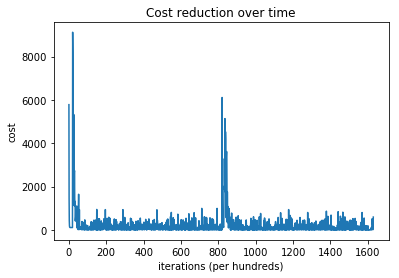

In [24]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

In [25]:
sgd_reg = SGDRegressor(n_iter=10, penalty=None, eta0=0.0001)
sgd_reg.fit(x_train, y_train)
sgd_reg.intercept_, sgd_reg.coef_

C:\Users\saish\Anaconda2\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\saish\Anaconda2\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([ 0.03879795]), array([ 1.51232654]))

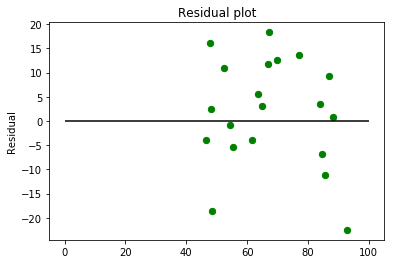

In [26]:
plt.scatter(final_ts_pred, final_ts_pred.T - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')

# Mini-Batch Gradient Descent

In [27]:
def miniBatchUpdate(w,b,X, Y, learning_rate, no_iterations):
    #
    n_points = X.shape[0]
    #
    for i in range(no_iterations):
        X, y = shuffle(x_train, y_train)
        x_random = X[:40]
        y_random = y[:40]
        
        grads, cost = model_optimize(w,b, x_random,y_random)
        #
        dw = grads["dw"]
        db = grads["db"]
        #Weight Update
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)
        #
        costs.append(cost)
    #
    
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs 

In [28]:
start_time = time.time()
#Get number of features
n_features = x_train.shape[1]
m_tr = x_train.shape[0]
m_ts = x_test.shape[0]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)


#Gradient Descent
coeff, gradient, costs = miniBatchUpdate(w, b, x_train, y_train, learning_rate=0.0001,no_iterations=10)
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)
#


final_tr_pred = predict(x_train, w,b)
final_tr_cost = (1/m_tr)*np.sum((y_train.T - final_tr_pred) ** 2)
print('Training error',final_tr_cost)
#
final_ts_pred = predict(x_test, w,b)
final_ts_cost = (1/m_ts)*np.sum((y_test.T - final_ts_pred) ** 2)
print('Test error',final_ts_cost)
#
print('Model R^2 Square value', metrics.r2_score(y_test, final_ts_pred.T))

print("--- %s seconds ---" % (time.time() - start_time))

Number of Features 1
Optimized weights [[ 1.47463605]]
Optimized intercept 0.0293168267417
Training error 110.412981191
Test error 121.828542871
Model R^2 Square value 0.694251593251
--- 0.00601649284362793 seconds ---


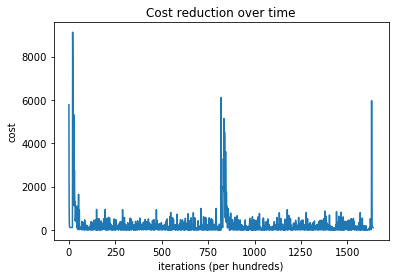

In [29]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

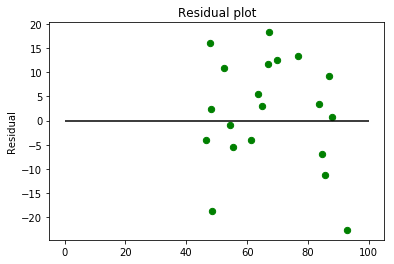

In [21]:
plt.scatter(final_ts_pred, final_ts_pred.T - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')